# Part II - The Characteristics That Determine Borrower Annual Percentage Rate(APR)
## by Rhoda Ojetola


## Investigation Overview

> In this investigation, I wanted to look at the characteristics of Borrower that could be used to predict their Borrower Annual Percentage Rate. The main focus was on the four Credit Score, Home Ownership and Prosper Rating.


## Dataset Overview

> Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. these are the description of variables we will look at in this investigation
> - BorrowerAPR The Borrower's Annual Percentage Rate (APR) for the loan
> - CreditScoreRangeUpper The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency
> - ProsperRating (Alpha): A proprietary rating developed by Prosper to analyze a listing level of risk. It folows this order **AA-A-B-C-D-E-HR (from lowest risk to the highest risk)**
> - IsBorrowerHomeowner	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv("prosperLoanData.csv")
loan_clean = loan_df.copy()
print(loan_clean.shape)

(113937, 81)


In [3]:
# Data wrangling
col_wanted = ["BorrowerAPR", "ProsperRating (Alpha)", "IsBorrowerHomeowner",
              "CreditScoreRangeUpper",]

for column in loan_clean.columns:
    if column not in col_wanted:
        loan_clean.drop([column], axis=1, inplace=True)
        
loan_clean.shape 

order_dict = {'ProsperRating (Alpha)': ["AA", "A", "B", "C", "D", "E", "HR"]}

for key in order_dict:
    order_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = order_dict[key])
    loan_clean[key] = loan_clean[key].astype(order_cat)
loan_clean.dropna(axis=0, inplace=True)
loan_clean.shape
# print(loan_clean.isna().sum().to_dict())
# dd =loan_clean.iloc[0]
# dd
# rows_above_300k = loan_clean[loan_clean["StatedMonthlyIncome"] > 300000].index
# loan_clean.drop(rows_above_300k, axis=0, inplace=True)

(84853, 4)

## Distribution of Borrowers Annual Percentage Rate (BorrowerAPR)

> Borrower APR in the dataset take on a very large range of values, from about  0.05 at the lowest,to about o.40 at the highest. The distribution of Borrower APR takes on a Bimodal shape.
Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

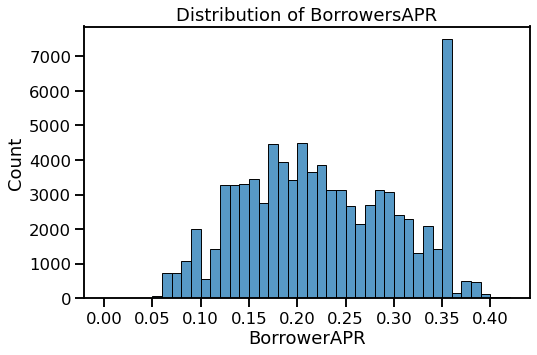

In [4]:
sb.set_context("talk")
bins = np.arange(0, np.max(loan_clean['BorrowerAPR'])+0.001, 0.01)
plt.figure(figsize=[8,5])
sb.histplot(data=loan_clean, x="BorrowerAPR", bins=bins)
ticks = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
plt.xticks(ticks)
plt.title("Distribution of BorrowersAPR");

## Distribution of Credit Scores 
> Credit Scores in the dataset take on a very small range of values, from about  600 at the lowest,to about 900 at the highest. The distribution of Borrower APR takes on a symmetric and Unimodal shape.


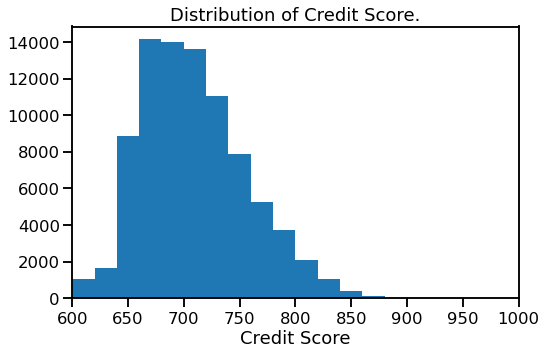

In [5]:
bins =np.arange(0, loan_clean["CreditScoreRangeUpper"].max()+5, 20)
plt.figure(figsize=[8,5])
plt.hist(data=loan_clean, x="CreditScoreRangeUpper", bins=bins)
plt.xlabel("Credit Score")
plt.title("Distribution of Credit Score.")
plt.xlim((600, 1000));

## Relationship Between Borrower APR and Credit Score ( Borrower APR VS Credit Score)
> Plotting Borrower APR against Credut Score produces an approximately linear relationship and a negative correlation. Based on the trend of the correlation, we might expect high credit scores to take low Borrower APR.

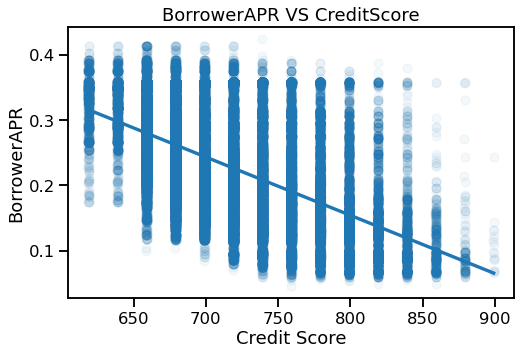

In [6]:
plt.figure(figsize=[8,5])
sb.regplot(data=loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", x_jitter=0.3, scatter_kws={"alpha": 1/20})
plt.title("BorrowerAPR VS CreditScore")
plt.xlabel("Credit Score");

## Borrower APR and Credit Score by Prosper Rating 

> Most low risk loans are from borrowers with high credit scores of above 800, low credit scores below 750 had more borrowers with high risk rating. The high Borrowers APR are associated with high risk proper rating and low Borrowers APR are associated with low risk proper rating.

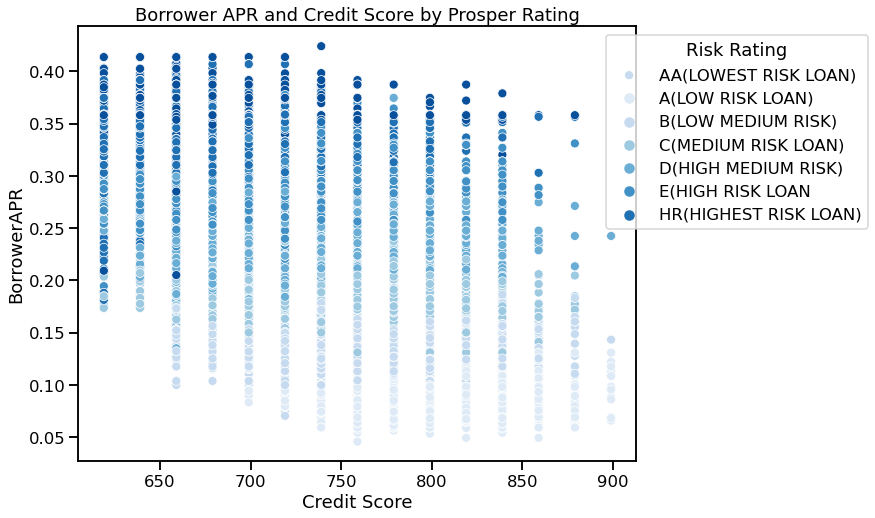

In [7]:
plt.figure(figsize=[10,8])
labels = ["AA(LOWEST RISK LOAN)", "A(LOW RISK LOAN)", "B(LOW MEDIUM RISK)", "C(MEDIUM RISK LOAN)", "D(HIGH MEDIUM RISK)", "E(HIGH RISK LOAN", "HR(HIGHEST RISK LOAN)"]
sb.scatterplot(data= loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", hue="ProsperRating (Alpha)",palette="Blues")
plt.xlabel("Credit Score")
plt.legend(bbox_to_anchor=(1.43, 1),loc="upper right", labels=labels, title="Risk Rating")
plt.title("Borrower APR and Credit Score by Prosper Rating");

## Borrower APR and Credit Score by Home Ownership

> Low Borrower APR are found in the highest credit scores above 800 and theses borrowers are mostly home owners, The high borrower APR loans found in low credit scores borrowers and majority of theses borrowers are not home owners.

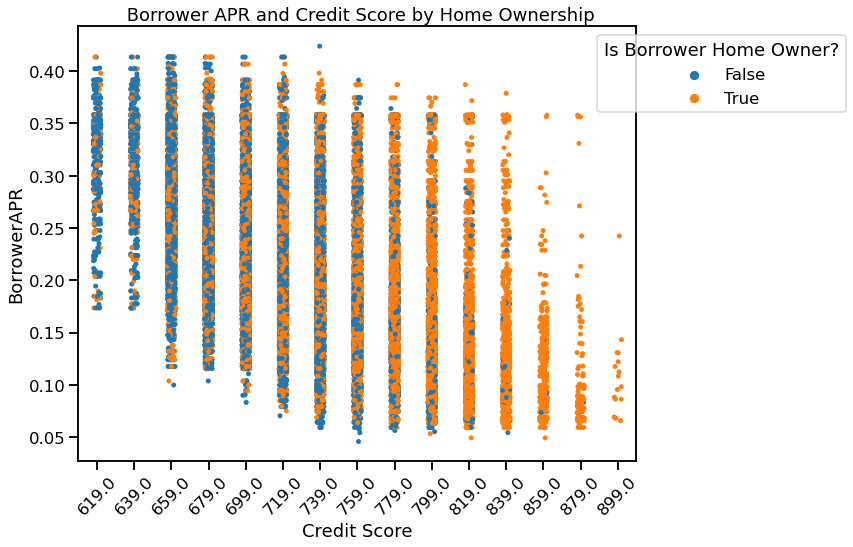

In [8]:
plt.figure(figsize=[10,8])
strip =sb.stripplot(data= loan_clean, x="CreditScoreRangeUpper", y="BorrowerAPR", hue="IsBorrowerHomeowner")
plt.xticks(rotation=45)
plt.title(" Borrower APR and Credit Score by Home Ownership")
plt.legend(bbox_to_anchor=(1.39, 1),loc="upper right", title="Is Borrower Home Owner?")
plt.xlabel("Credit Score");